<a href="https://colab.research.google.com/github/Coolffee/AD-BigD_A3UnP/blob/main/AD%26BigD_A3UnPio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install optuna
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
import optuna as optuna


Visão geral dos dados:

In [33]:
# Carregar o arquivo csv
df = pd.read_csv('/content/drive/MyDrive/profzumba/dados_supermercado_categoricos.csv')
#limpando partes em branco e transformando em listas
df.dropna(inplace=True)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Faixa Etária,Gênero,Frequência de Compras,Valor Médio de Compra,Categoria de Produto Favorita
0,>75,Feminino,Mensal,150-200,Bebidas
1,46-55,Feminino,Diária,100-150,Higiene Pessoal
2,56-65,Masculino,Diária,>200,Bebidas
3,>75,Masculino,Mensal,50-100,Bebidas
4,36-45,Masculino,Semanal,>200,Limpeza


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


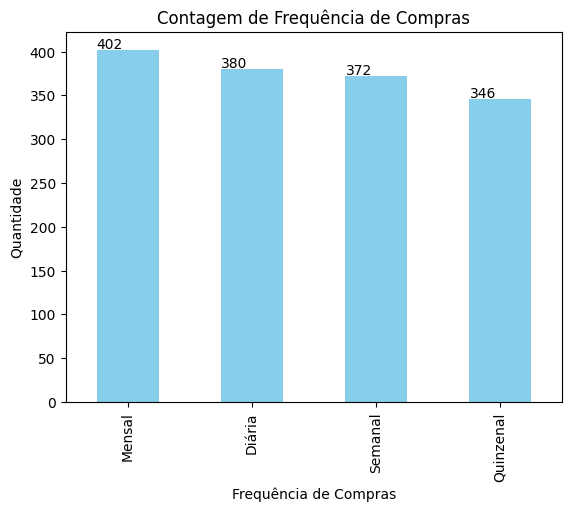

In [34]:
contagem_frequencia = df['Frequência de Compras'].value_counts()

# Criar o gráfico de barras
ax = contagem_frequencia.plot(kind='bar', color='skyblue')

# Adicionar título e rótulos aos eixos
plt.title('Contagem de Frequência de Compras')
plt.xlabel('Frequência de Compras')
plt.ylabel('Quantidade')

# Adicionar rótulos nas pontas das barras
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Exibir o gráfico
plt.show()

Na primeira parte foi feito um algoritmo Apriori

In [ ]:
transactions = df.values.tolist()
#print para saber se funcionou corretamente
print(transactions[:5])

In [36]:
# Utilizando modelo Apriori

from mlxtend.frequent_patterns import apriori, association_rules

df_tr = pd.DataFrame(transactions)
df_onehot = pd.get_dummies(df_tr.stack()).groupby(level=0).sum()

# Aplicar o algoritmo Apriori e gerar regras de associação
frequent_itemsets = apriori(df_onehot, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print("_______________________________________________________________")
print(rules)


_______________________________________________________________
          antecedents        consequents  antecedent support  \
0           (100-150)        (Masculino)            0.214000   
1         (Masculino)          (100-150)            0.505333   
2           (150-200)        (Masculino)            0.193333   
3         (Masculino)          (150-200)            0.505333   
4               (<50)         (Feminino)            0.199333   
5          (Feminino)              (<50)            0.494667   
6         (Masculino)             (>200)            0.505333   
7              (>200)        (Masculino)            0.207333   
8         (Alimentos)        (Masculino)            0.193333   
9         (Masculino)        (Alimentos)            0.505333   
10          (Bebidas)         (Feminino)            0.201333   
11         (Feminino)          (Bebidas)            0.494667   
12           (Diária)         (Feminino)            0.253333   
13         (Feminino)           (Diária)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [37]:
rules.describe()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,0.358436,0.358436,0.111538,0.369573,1.031715,0.003211,1.020832,0.049014
std,0.145874,0.145874,0.010823,0.150658,0.026739,0.002585,0.024734,0.042441
min,0.193333,0.193333,0.100667,0.199208,1.000142,0.000018,1.000048,0.000190
25%,0.203333,0.203333,0.104667,0.214050,1.010724,0.001344,1.004993,0.015896
50%,0.381333,0.381333,0.107333,0.381933,1.030388,0.002969,1.010030,0.039532
75%,0.502667,0.502667,0.116000,0.511352,1.035314,0.003593,1.030935,0.064161
max,0.505333,0.505333,0.136000,0.544828,1.088534,0.008730,1.094889,0.160950


Em seguida, o algorimo utilizando um algoritmo de árvore de decisão

Teste 1a:

In [44]:
X = df[['Faixa Etária', 'Gênero', 'Frequência de Compras', 'Valor Médio de Compra']]
y = df['Categoria de Produto Favorita']

# Codificar as variáveis categóricas usando LabelEncoder
label_encoders = {}
for column in X.columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Codificar a variável alvo
le_target = LabelEncoder()
y = le_target.fit_transform(y)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-44-11133be97dd8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column])
<ipython-input-44-11133be97dd8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy: 0.22333333333333333
Precision: 0.2373440354872529
Recall: 0.22333333333333333
F1-Score: 0.21949365362470463
                 precision    recall  f1-score   support

      Alimentos       0.17      0.15      0.16        62
        Bebidas       0.22      0.25      0.24        60
Higiene Pessoal       0.21      0.35      0.27        54
        Limpeza       0.34      0.16      0.22        68
         Outros       0.22      0.23      0.23        56

       accuracy                           0.22       300
      macro avg       0.23      0.23      0.22       300
   weighted avg       0.24      0.22      0.22       300



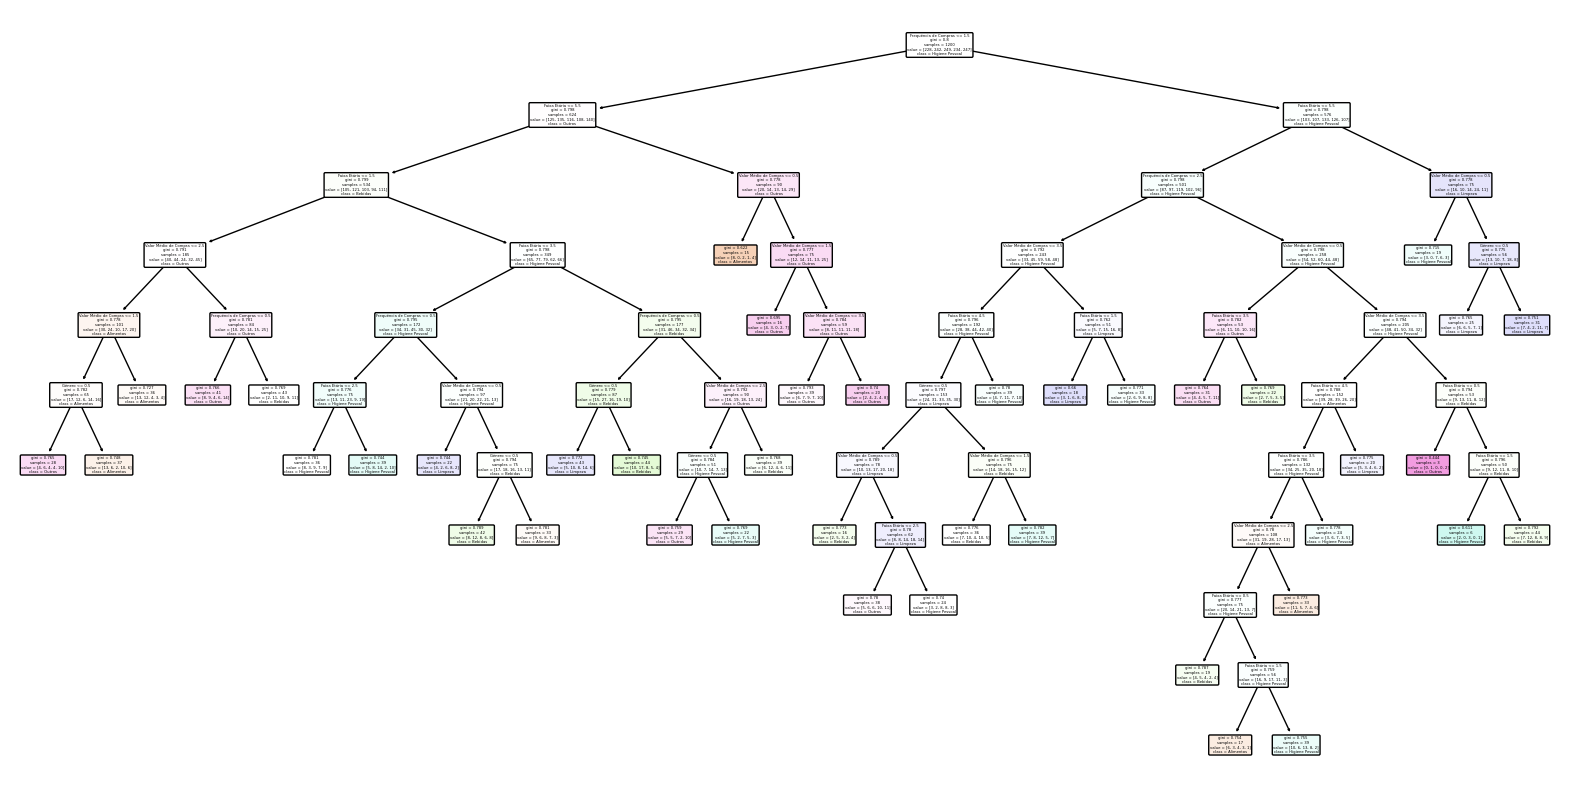

In [45]:
# Dividir o conjunto de dados em subconjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir o modelo de árvore de decisão
dt = DecisionTreeClassifier(random_state=42)

# Ajustar os hiperparâmetros para otimizar a performance do modelo
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'min_samples_split': [2, 5, 10, 50],
    'min_samples_leaf': [1, 2, 4, 7]
}

# Usar GridSearchCV para encontrar os melhores hiperparâmetros
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Melhor modelo encontrado
best_dt = grid_search.best_estimator_

# Fazer previsões no conjunto de teste
y_pred = best_dt.predict(X_test)

# Calcular métricas de performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# Exibir o relatório de classificação
print(classification_report(y_test, y_pred, target_names=le_target.classes_))

# Visualizar a árvore de decisão
plt.figure(figsize=(20, 10))
plot_tree(best_dt, filled=True, feature_names=X.columns, class_names=le_target.classes_, rounded=True)
plt.show()

Teste com Optuna

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[I 2024-06-21 09:11:06,360] A new study created in memory with name: no-name-21e8e96d-1173-4646-9ab9-2a16fb4deef1
[I 2024-06-21 09:11:06,431] Trial 0 finished with value: 0.25666666666666665 and parameters: {'max_depth': 23, 'min_samples_split': 68, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.25666666666666665.
[I 2024-06-21 09:11:06,461] Trial 1 finished with value: 0.22 and parameters: {'max_depth': 5, 'min_samples_split': 75, 'min_samples_leaf': 44}. Best is trial 0 with value: 0.25666666666666665.
[I 2024-06-21 09:11:06,493] Trial 2 finished with value: 0.25 and parameters: {'max_depth': 24, 'min_samples_split': 56, 'min_sa

Accuracy: 0.26
Precision: 0.26753506629228707
Recall: 0.26
F1-Score: 0.2571883821228491
                 precision    recall  f1-score   support

      Alimentos       0.24      0.16      0.19        62
        Bebidas       0.24      0.37      0.29        60
Higiene Pessoal       0.20      0.24      0.22        54
        Limpeza       0.33      0.31      0.32        68
         Outros       0.32      0.21      0.26        56

       accuracy                           0.26       300
      macro avg       0.27      0.26      0.26       300
   weighted avg       0.27      0.26      0.26       300



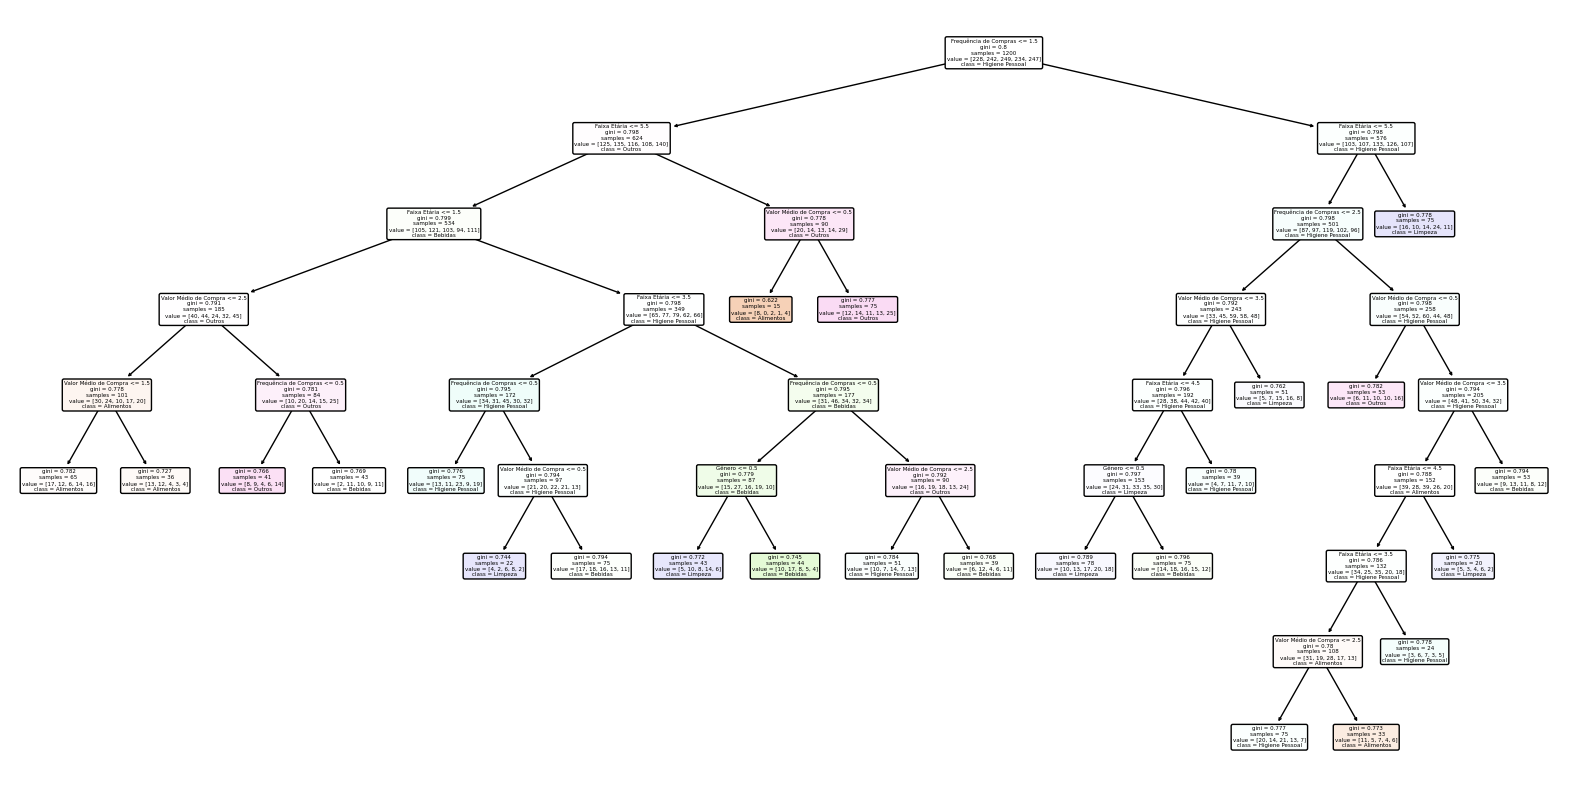

In [41]:
def objective(trial):
    # Sugerir valores para os hiperparâmetros
    max_depth = trial.suggest_int('max_depth', 1, 100)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 100)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 50)

    # Definir o modelo de árvore de decisão
    dt = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    # Treinar o modelo
    dt.fit(X_train, y_train)

    # Fazer previsões no conjunto de validação
    y_pred = dt.predict(X_test)

    # Calcular a precisão
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Criar o estudo Optuna e otimizar a função objetiva
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Melhor modelo encontrado
best_params = study.best_params
best_dt = DecisionTreeClassifier(**best_params, random_state=42)
best_dt.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = best_dt.predict(X_test)

# Calcular métricas de performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# Exibir o relatório de classificação
print(classification_report(y_test, y_pred, target_names=le_target.classes_))

# Visualizar a árvore de decisão
plt.figure(figsize=(20, 10))
plot_tree(best_dt, filled=True, feature_names=X.columns, class_names=le_target.classes_, rounded=True)
plt.show()
